<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Análisis de Regresión No Lineal

Tiempo estimado: **20 minutos**

---

## Objetivos

Después de completar este laboratorio, podrás:

* Diferenciar entre **regresión lineal** y **regresión no lineal**.
* Utilizar un **modelo de regresión no lineal** en Python.


Si los datos muestran una **tendencia curva**, la **regresión lineal** no ofrecerá resultados muy precisos en comparación con una **regresión no lineal**, ya que la regresión lineal **presupone una relación lineal** entre las variables.

Vamos a aprender sobre las **regresiones no lineales** y aplicar un ejemplo en Python.
En este notebook ajustaremos un modelo no lineal a los puntos de datos correspondientes al **PIB de China** entre **1960 y 2014**.

<h2 id="importing_libraries">Importación de librerías necesarias</h2>


In [402]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Aunque la **regresión lineal** puede modelar adecuadamente algunos conjuntos de datos, **no puede aplicarse a todos**.
Recordemos que la regresión lineal modela la relación lineal entre una variable dependiente (y) y una o varias variables independientes (x).
Su ecuación es de **grado 1**, por ejemplo:
$$ y = 2x + 3 $$

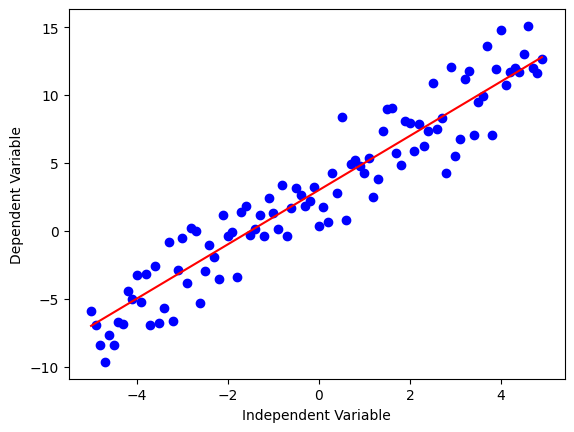

In [403]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

La **regresión no lineal** es un método para modelar una **relación no lineal** entre las variables independientes (x) y la variable dependiente (y).
En esencia, cualquier relación que **no sea lineal** puede considerarse no lineal y suele representarse mediante un **polinomio de grado (k)** (la máxima potencia de (x)).
Por ejemplo:

$$ y = a x^3 + b x^2 + c x + d $$

Las funciones no lineales también pueden incluir **exponenciales**, **logaritmos**, **fracciones**, etc.
Por ejemplo:
$$ y = \log(x) $$

Incluso podemos tener funciones más complejas, como:
$$ y = \log(a x^3 + b x^2 + c x + d) $$

A continuación, observaremos el **gráfico de una función cúbica**.


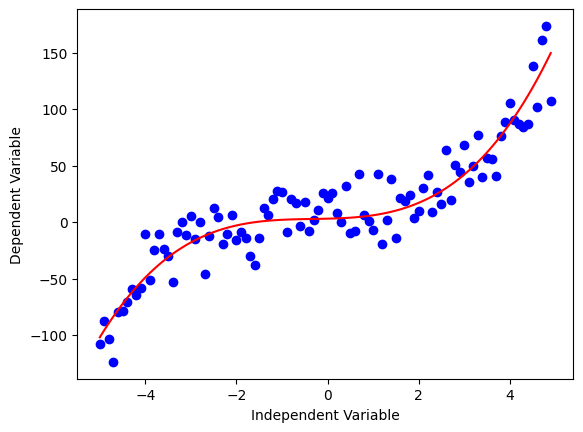

In [404]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Como puedes ver, esta función incluye $x^3$ and $x^2$ como variables independientes. Además, su representación gráfica **no es una línea recta** en el plano 2D, por lo que se trata de una **función no lineal**.

Algunos otros tipos de funciones no lineales son:


### Cuadrática


$$ Y = X^2 $$


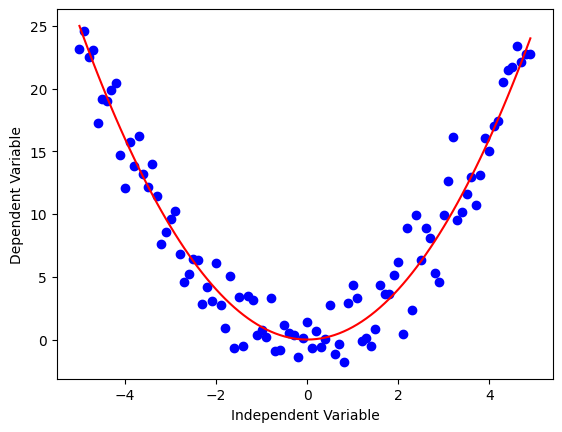

In [405]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Exponencial


Una **función exponencial** con base (c) se define como:

$$ Y = a + b c^X $$

donde b ≠0, c > 0 , c ≠1, y (x) es cualquier número real.
La **base** (c) es constante y el **exponente** (x) es una variable.

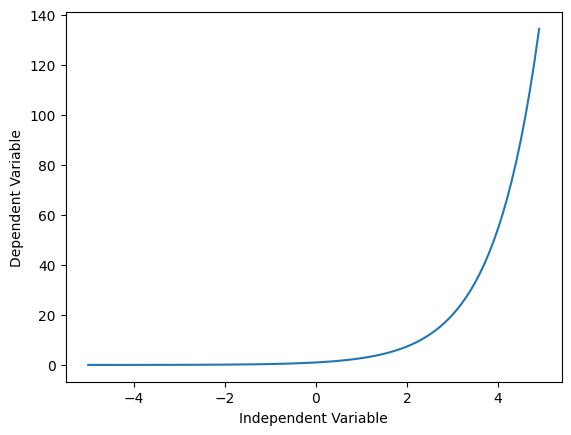

In [406]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarítmica

La respuesta (y) resulta de aplicar el **mapa logarítmico** desde la entrada (x) hasta la salida (y).
Es una de las formas más simples de la función logarítmica:

$$ y = \log(x) $$

Cabe señalar que, en lugar de (x), podemos utilizar (X), que puede ser una representación polinómica de los valores de (x).
En forma general, se escribiría como:

$
y = \log(X)
$



/tmp/ipykernel_1542/2233958358.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


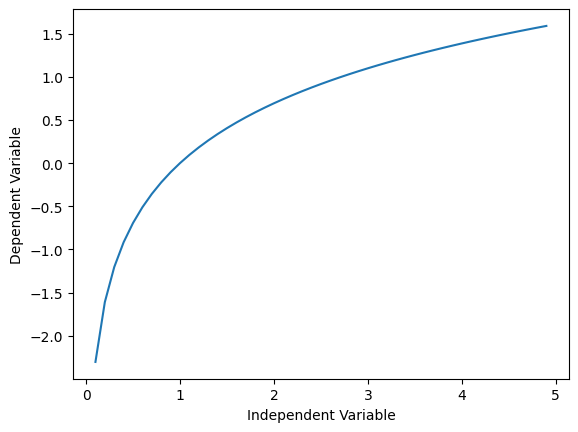

In [407]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Sigmoidal / Logística


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


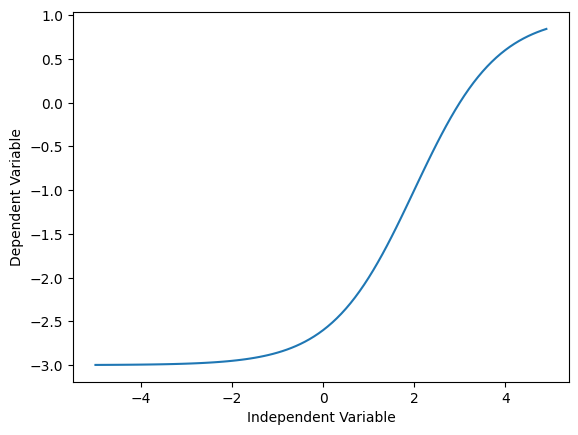

In [408]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<a id="ref2"></a>

# Ejemplo de regresión no lineal


Como ejemplo, intentaremos ajustar un **modelo no lineal** a los puntos de datos correspondientes al **PIB de China** desde **1960 hasta 2014**.
El conjunto de datos contiene dos columnas:

* La primera indica el **año** (entre 1960 y 2014).
* La segunda, el **Producto Interior Bruto anual de China** en dólares estadounidenses para ese año.

In [409]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

/bin/bash: line 1: wget: command not found


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Representación del conjunto de datos

Así es como se ven los puntos de datos.
Parece una **función logística o exponencial**: el crecimiento comienza de forma **lenta**, luego a partir de **2005** se vuelve **muy pronunciado**, y finalmente **se desacelera ligeramente** durante la década de **2010**.

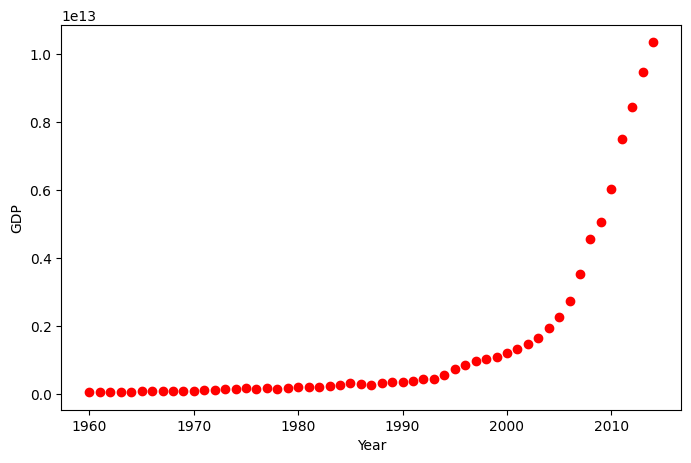

In [410]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Elección de un modelo

A partir de una primera observación del gráfico, determinamos que la función logística podría ser una buena aproximación, ya que tiene la propiedad de comenzar con un crecimiento lento, aumentar su crecimiento en la parte media y luego disminuir nuevamente al final; como se ilustra a continuación:


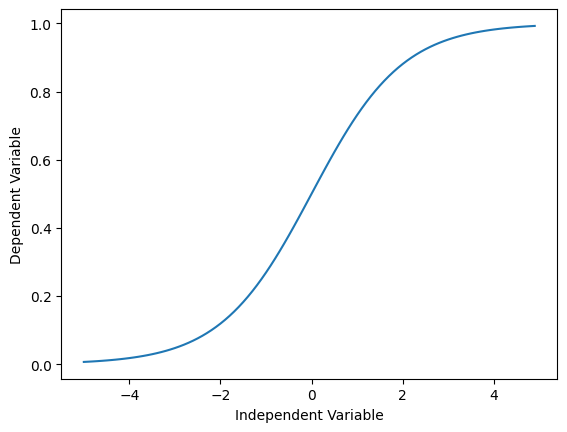

In [411]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

La fórmula de la función logística es la siguiente:

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

$\beta_1$: Controla la pendiente de la curva.

$\beta_2$: Desplaza la curva a lo largo del eje x.


### Construcción del modelo

Ahora, construyamos nuestro modelo de regresión e inicialicemos sus parámetros.

In [412]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Veamos un ejemplo de una línea sigmoide que podría ajustarse a los datos:

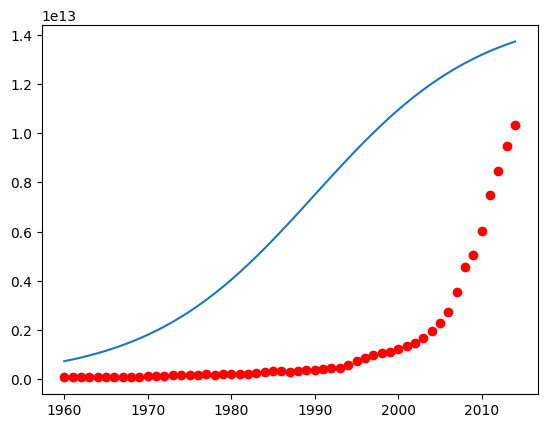

In [413]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Nuestra tarea aquí es encontrar los mejores parámetros para nuestro modelo.
Primero, normalicemos nuestras variables x e y:

In [414]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

mask = np.random.rand(len(df)) < 0.8

x_train = xdata[mask]
y_train = ydata[mask]

x_test = xdata[~mask]
y_test = ydata[~mask]

#### ¿Cómo encontramos los mejores parámetros para nuestra línea de ajuste?

Podemos usar **curve_fit**, que utiliza el método de *mínimos cuadrados no lineales* para ajustar nuestra función sigmoide a los datos. Este método optimiza los valores de los parámetros de manera que la suma de los residuos al cuadrado de `sigmoid(xdata, *popt) - ydata` sea mínima.

`popt` son nuestros parámetros optimizados.

In [415]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_train, y_train)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 743.575996, beta_2 = 0.997232


Luego, representamos gráficamente el modelo de regresión resultante.

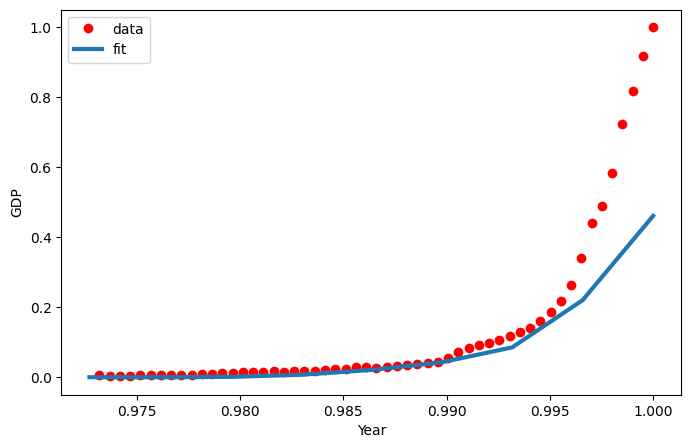

In [417]:
x = np.linspace(1960, 2015, 9)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x_test, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Práctica

¿Puedes calcular cuál es la **precisión** de nuestro modelo?

In [418]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(f"RMSE: {root_mean_squared_error(y_test, y)}")
print(f"R2: {r2_score(y_test, y)}")

RMSE: 0.048578787384381004
R2: 0.8498581449367945



**IBM SPSS Modeler** es una plataforma de analítica integral que incluye numerosos algoritmos de aprendizaje automático. Está diseñada para aportar inteligencia predictiva a las decisiones tomadas por individuos, grupos, sistemas o por toda la organización.
Puedes acceder a una versión de prueba gratuita desde este curso:
👉 [SPSS Modeler](https://www.ibm.com/analytics/spss-statistics-software?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork)

También puedes usar **Watson Studio** para ejecutar estos notebooks más rápido y con conjuntos de datos más grandes. Watson Studio es la solución en la nube líder de IBM para científicos de datos, creada por científicos de datos.
Con Jupyter Notebooks, RStudio, Apache Spark y bibliotecas populares ya integradas en la nube, Watson Studio permite colaborar en proyectos sin necesidad de instalar nada.
Únete hoy a la comunidad de Watson Studio con una cuenta gratuita:
👉 [Watson Studio](https://www.ibm.com/cloud/watson-studio?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork)



### ¡Gracias por completar este laboratorio!

---

## Autor

**Saeed Aghabozorgi**

### Otros colaboradores

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Traducción

<a href="https://www.linkedin.com/in/carlostessier/" target="_blank">Carlos Tessier</a>


---

## <h3 align="center"> © IBM Corporation 2025. Todos los derechos reservados. </h3>